<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64
glazing_area_distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype

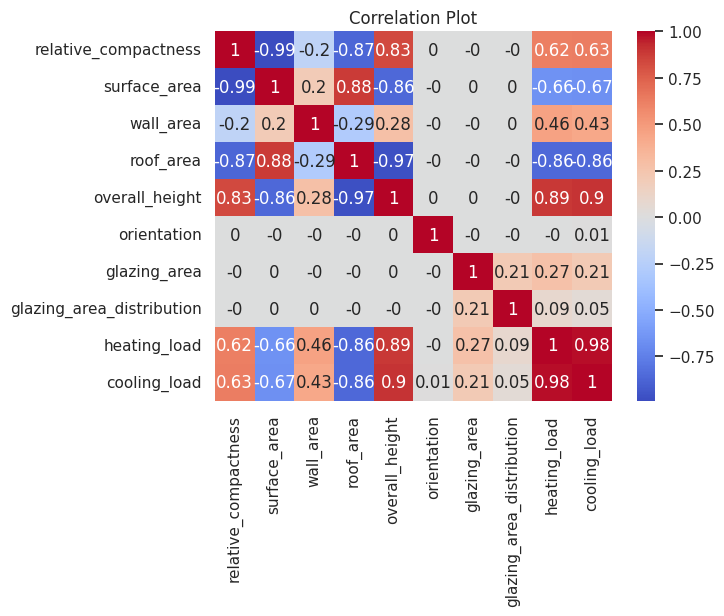

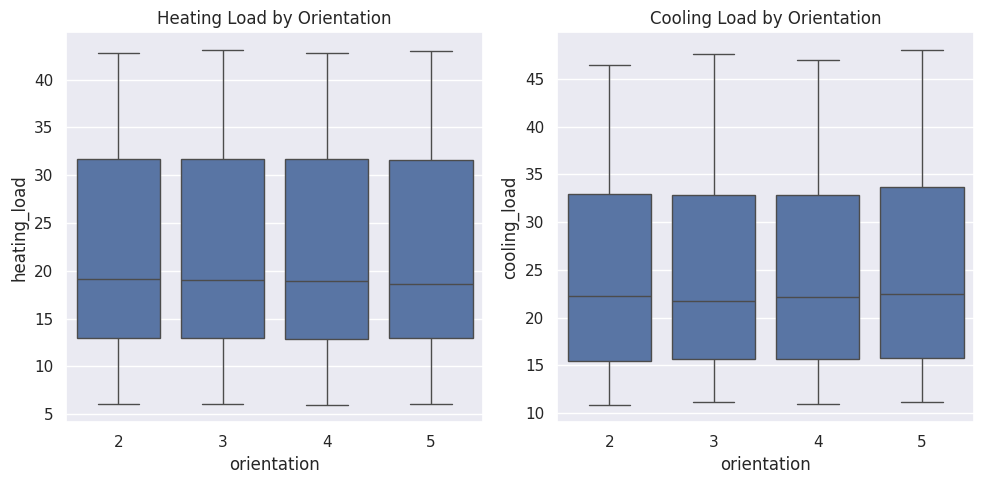

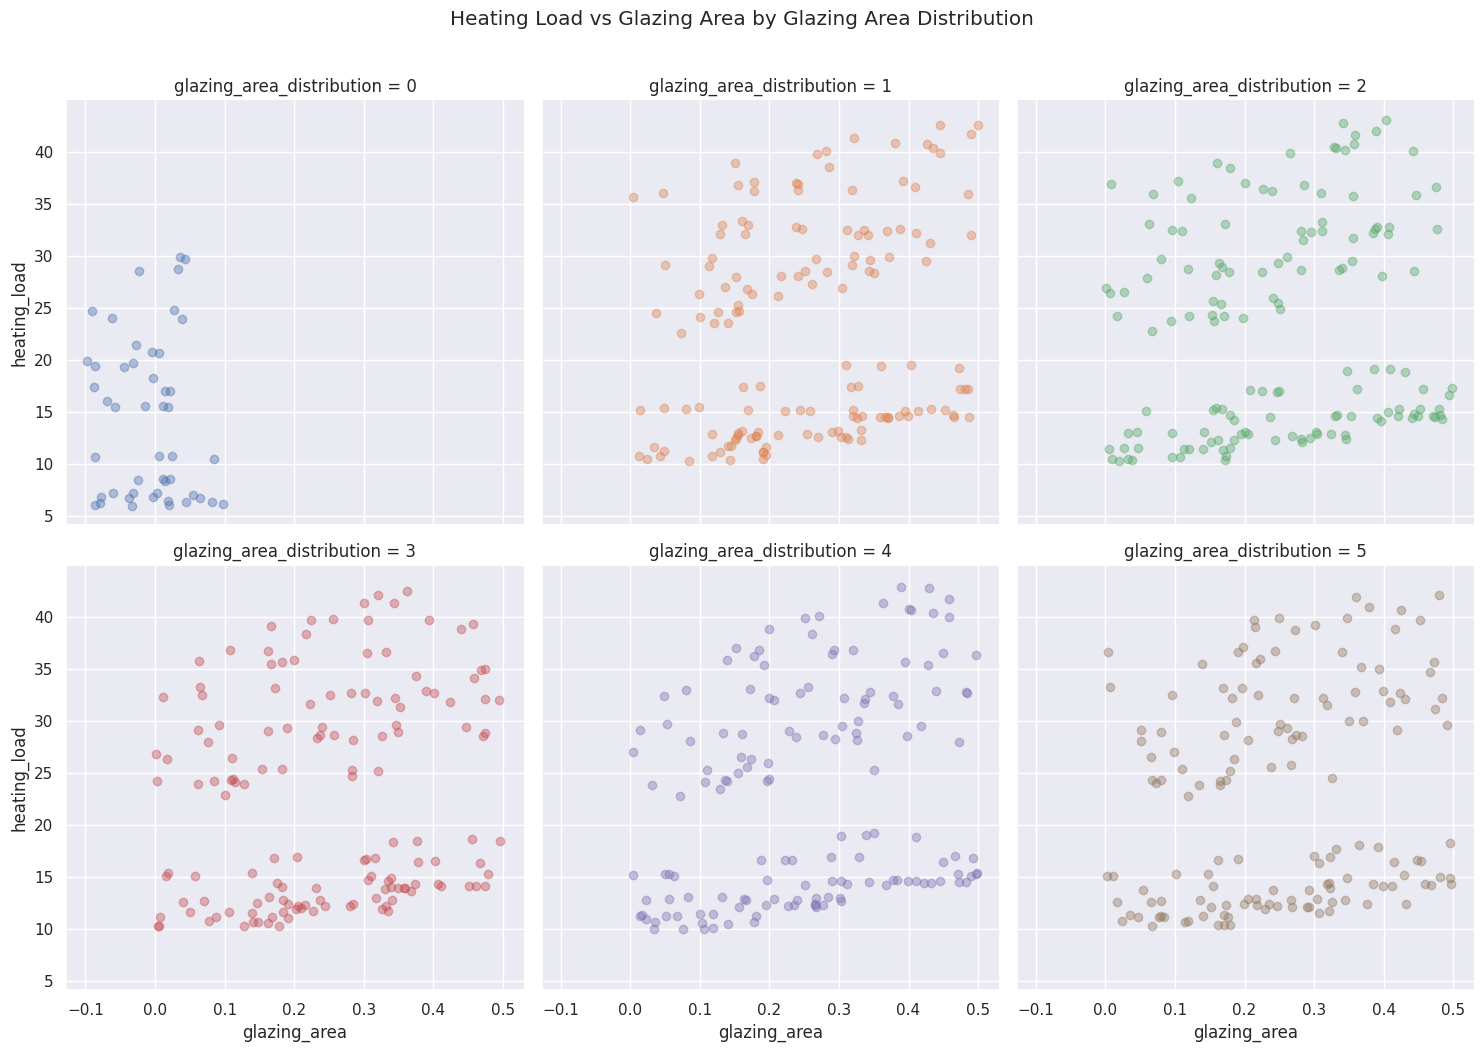

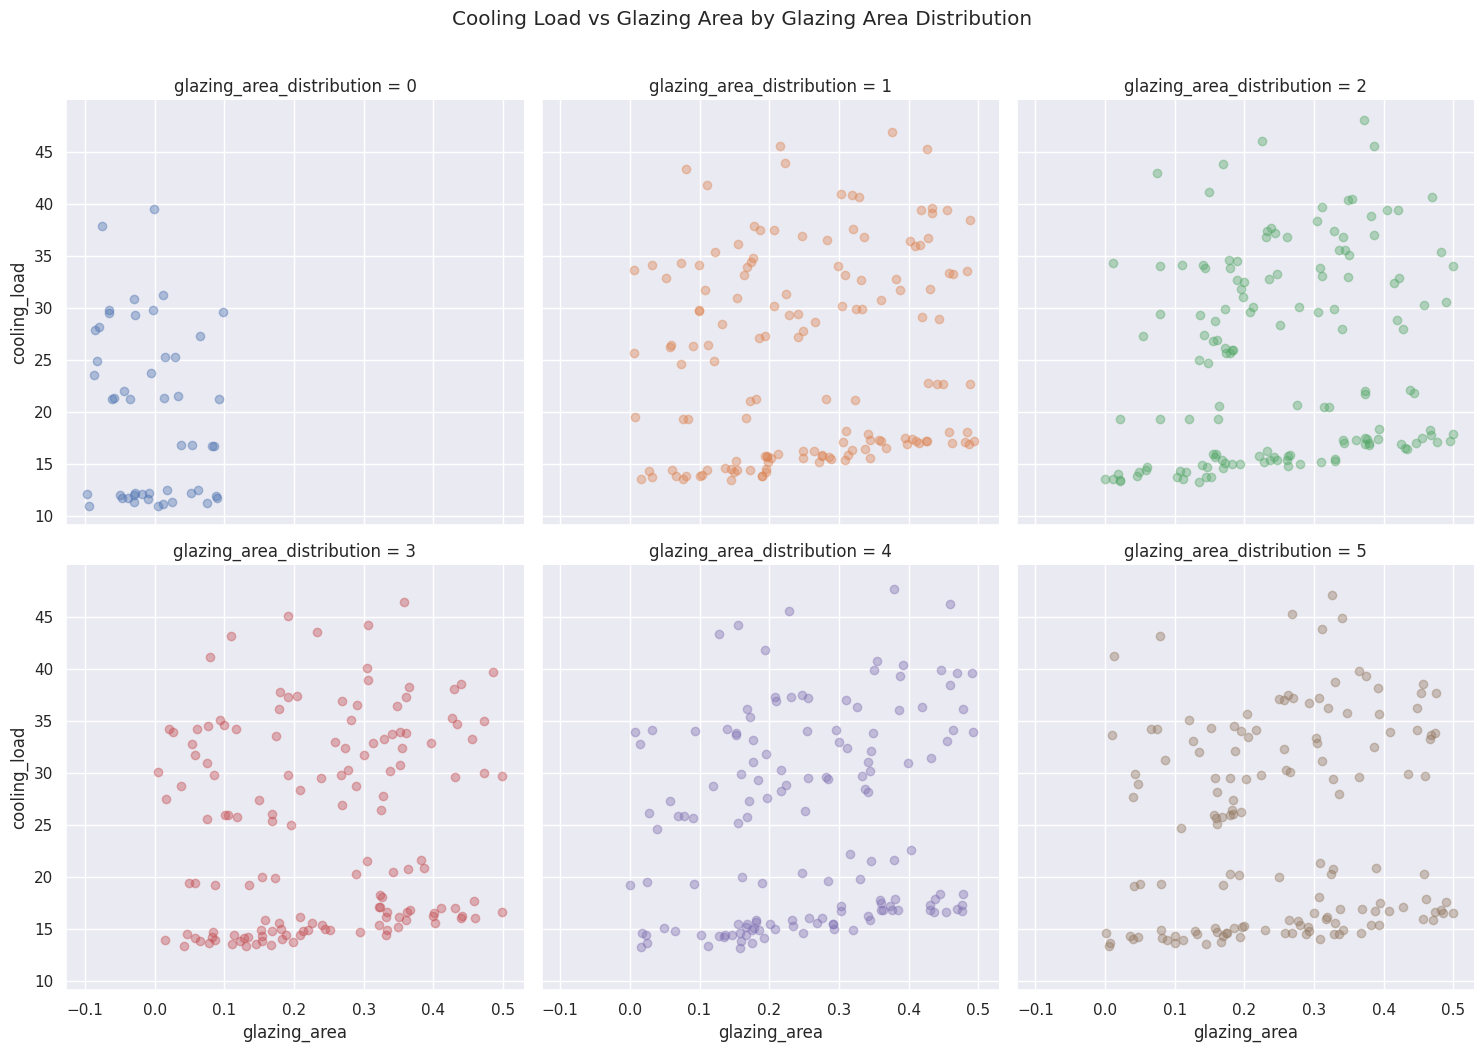

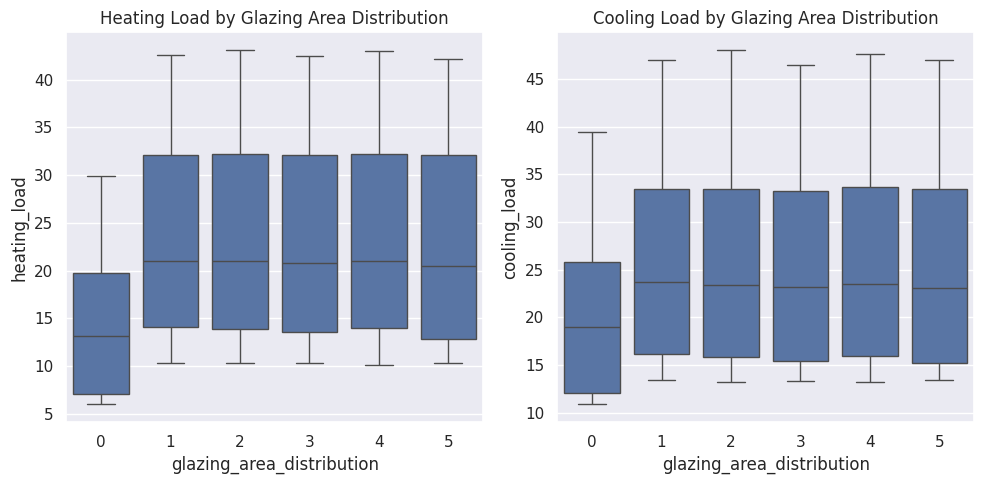

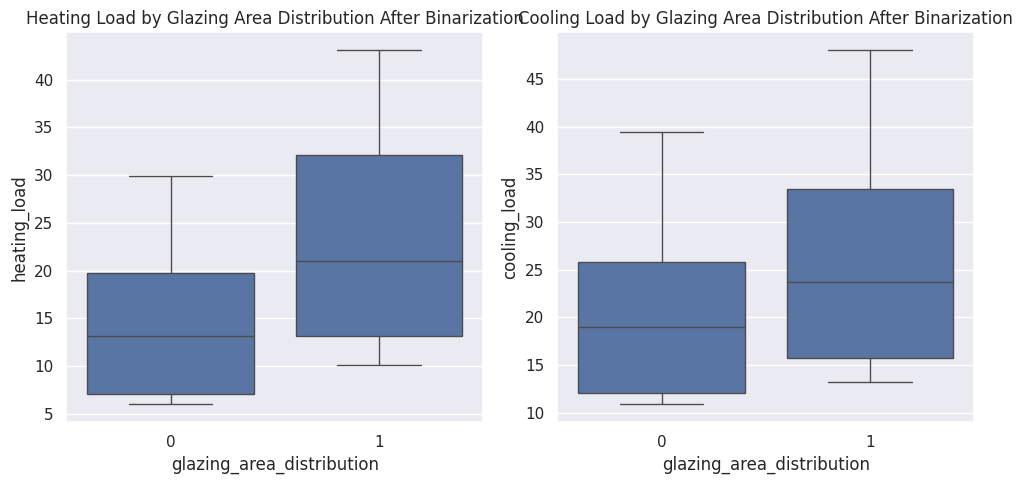

['relative_compactness',
 'wall_area',
 'roof_area',
 'overall_height',
 'glazing_area',
 'glazing_area_distribution']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

# load data
data = pd.read_excel('https://github.com/JielingChen/building_energy_efficiency_prediction/raw/main/ENB2012_data.xlsx')
data.head()

# rename columns to more informative names
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation',
                'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

# check data type and whether there is missing value and
data.info()

# check the distribution of these two variables to confirm
print(data['orientation'].value_counts())
print(data['glazing_area_distribution'].value_counts())

# change the data type to category
data['orientation'] = data['orientation'].astype('category')
data['glazing_area_distribution'] = data['glazing_area_distribution'].astype('category')

# check correlation between variables
corr = data.corr().round(2)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Plot')
plt.show()

# drop surface_area
data.drop(['surface_area'], axis=1, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether orientation has an impact on heating_load
sns.boxplot(data=data, x='orientation', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Orientation')

# check whether orientation has an impact on cooling_load
sns.boxplot(data=data, x='orientation', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Orientation')

plt.tight_layout()
plt.show()

# drop orientation to reduce dimensionality
data = data.drop('orientation', axis=1)

# check whether the glazing_area_distribution has an impact on the relationship between glazing_area and heating_load
lmplot = sns.lmplot(data=data, x='glazing_area', y='heating_load', hue='glazing_area_distribution',
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Heating Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()

# check whether the glazing_area_distribution has an impact on the relationship between glazing_area and cooling_load
lmplot = sns.lmplot(data=data, x='glazing_area', y='cooling_load', hue='glazing_area_distribution',
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Cooling Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution')

plt.tight_layout()
plt.show()


# change glazing_area_distribution to binary variable to reduce dimensionality
data['glazing_area_distribution'] = data['glazing_area_distribution'].replace({0:0, 1:1, 2:1, 3:1, 4:1, 5:1})
data['glazing_area_distribution'] = data['glazing_area_distribution'].astype('category')
data['glazing_area_distribution'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution After Binarization')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution After Binarization')

plt.tight_layout()
plt.show()

# splitting the dataset into features and targets
y1 = data['heating_load']
y2 = data['cooling_load']
X = data.drop(['heating_load','cooling_load'], axis = 1)

# check features
features = list(X.columns)
features



Heating load model adjusted R2 score: 
 0.9003
Cooling load model adjusted R2 score: 
 0.8623

MSE of predicting heating load: 
 9.8933
MSE of predicting cooling load: 
 12.2353

RMSE of predicting heating load: 
 3.1454
RMSE of predicting cooling load: 
 3.4979

MAE of predicting heating load: 
 2.3002
MAE of predicting cooling load: 
 2.4978


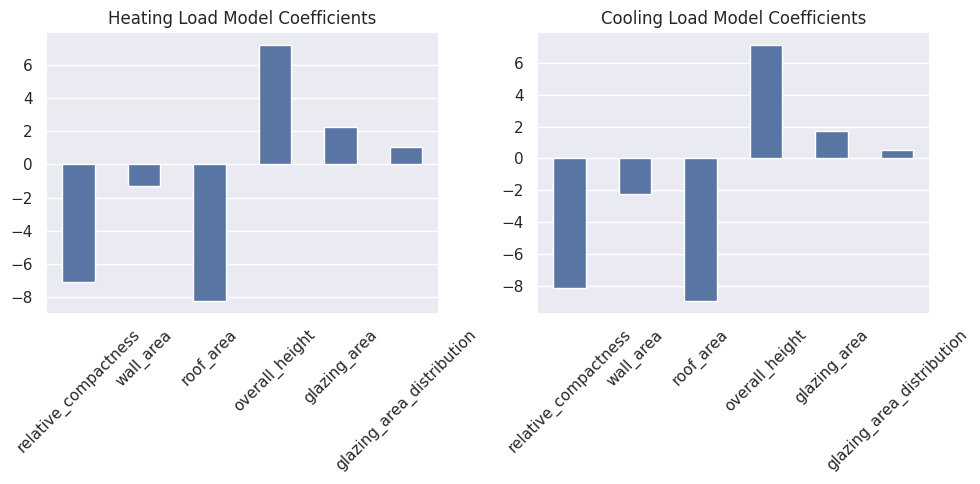

Heating load model coefficients:
relative_compactness : -7.0958458730476455
wall_area : -1.3159700922227593
roof_area : -8.234793485188415
overall_height : 7.183266594217719
glazing_area : 2.2416741152751656
glazing_area_distribution : 1.020804688621697
Heating load model intercept: 
 21.91440595903166

Cooling load model coefficients:
relative_compactness : -8.15611490605704
wall_area : -2.227514344870592
roof_area : -8.970425365072838
overall_height : 7.131722242939717
glazing_area : 1.7540712278958694
glazing_area_distribution : 0.513058498698021
Cooling load model intercept: 
 24.170484171322162


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed = 1

# split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state=seed)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# train the model and make predictions for heating_load
lr_heating = LinearRegression()
y1_pred = lr_heating.fit(X_train, y1_train).predict(X_test)
# train the model and make predictions for cooling_load
lr_cooling = LinearRegression()
y2_pred = lr_cooling.fit(X_train, y2_train).predict(X_test)

# check the model performance

# calculate the adjusted R2 score
adjuted_r2_heating = 1 - (1-r2_score(y1_test, y1_pred))*(len(y1_test)-1)/(len(y1_test)-X_test.shape[1]-1)
adjuted_r2_cooling = 1 - (1-r2_score(y2_test, y2_pred))*(len(y2_test)-1)/(len(y2_test)-X_test.shape[1]-1)
print('Heating load model adjusted R2 score: \n', adjuted_r2_heating.round(4))
print('Cooling load model adjusted R2 score: \n', adjuted_r2_cooling.round(4))
print('')

# calculate the MSE
print('MSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred).round(4))
print('MSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred).round(4))
print('')

# calculate the RMSE
print('RMSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred, squared=False).round(4))
print('RMSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred, squared=False).round(4))
print('')

# calculate the MAE
print('MAE of predicting heating load: \n', mean_absolute_error(y1_test, y1_pred).round(4))
print('MAE of predicting cooling load: \n', mean_absolute_error(y2_test, y2_pred).round(4))

# plot the coefficients of features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=features, y=lr_heating.coef_, width=0.5, ax=axes[0])
axes[0].set_title('Heating Load Model Coefficients')
axes[0].set_xticklabels(labels=features, rotation=45)

sns.barplot(x=features, y=lr_cooling.coef_, width=0.5, ax=axes[1])
axes[1].set_title('Cooling Load Model Coefficients')
axes[1].set_xticklabels(labels=features, rotation=45)

plt.tight_layout()
plt.show()


# check the coefficients and intercepts of the models
print('Heating load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', lr_heating.coef_[i])
print('Heating load model intercept: \n', lr_heating.intercept_)
print('')

print('Cooling load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', lr_cooling.coef_[i])
print('Cooling load model intercept: \n', lr_cooling.intercept_)




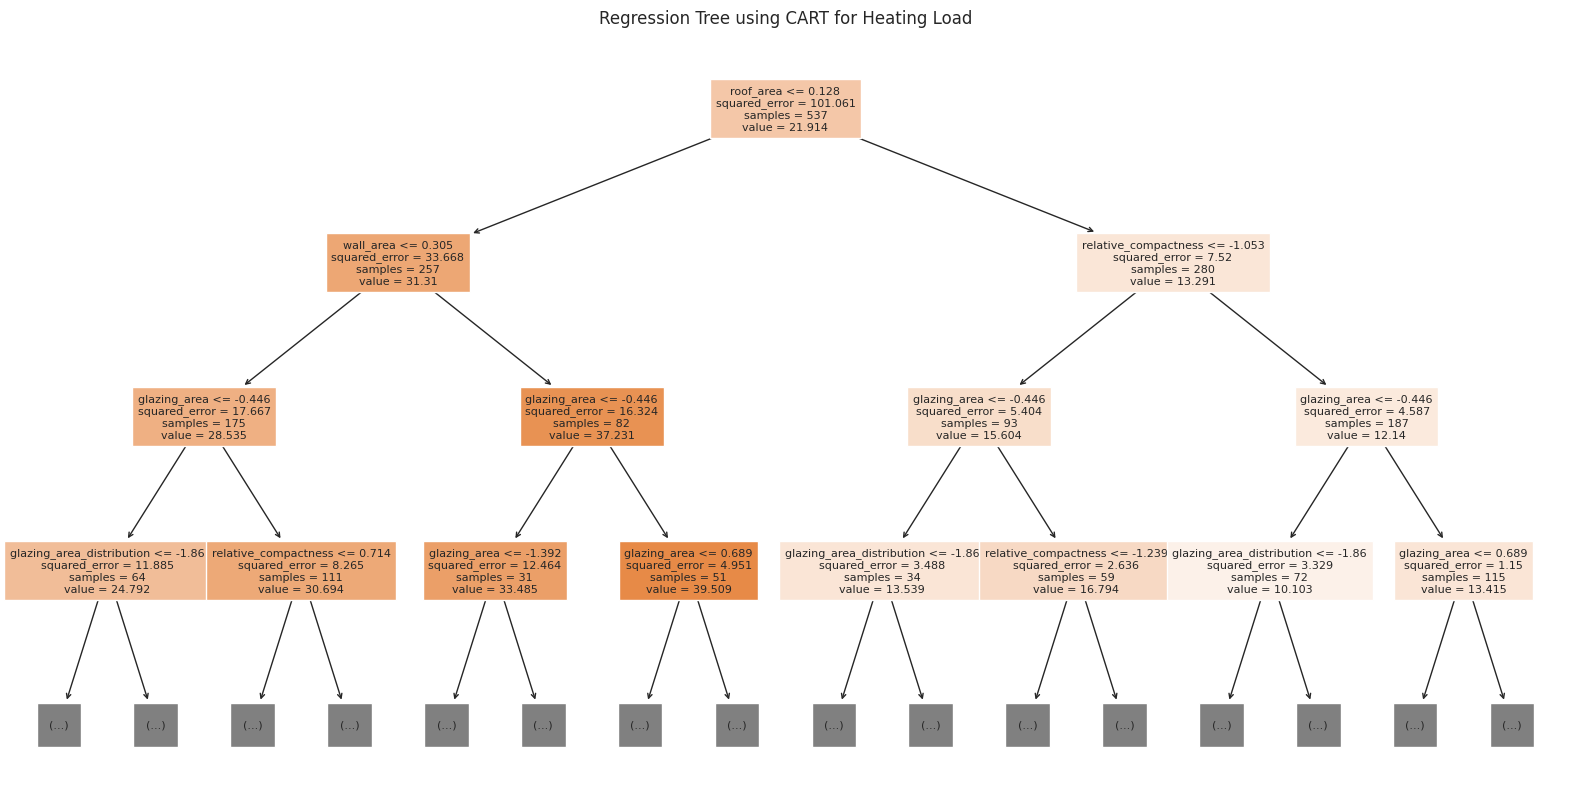

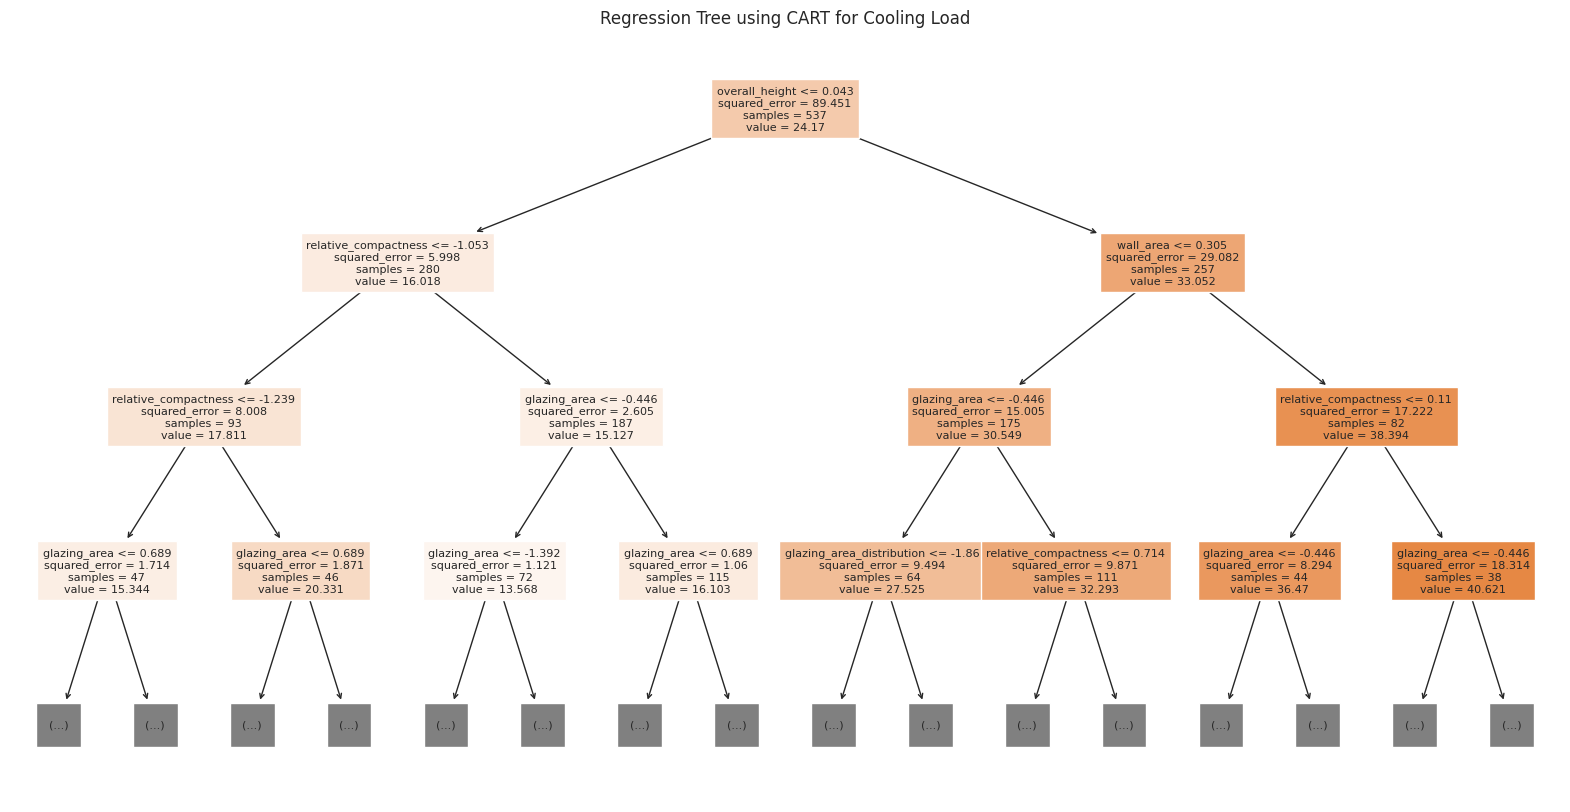

Heating load model adjusted R2 score: 
 0.9973
Cooling load model adjusted R2 score: 
 0.9563

MSE of predicting heating load: 
 0.2692
MSE of predicting cooling load: 
 3.8822

RMSE of predicting heating load: 
 0.5188
RMSE of predicting cooling load: 
 1.9703

MAE of predicting heating load: 
 0.3842
MAE of predicting cooling load: 
 1.2678


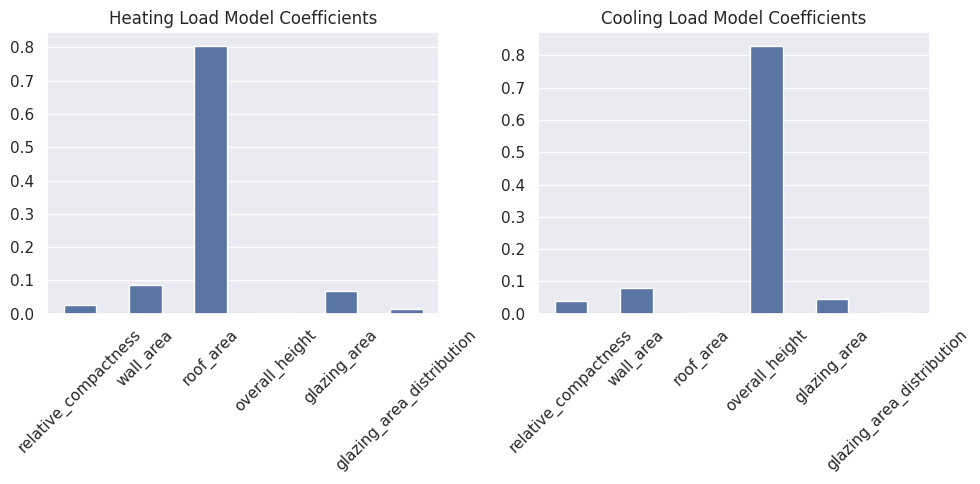

Heating load model coefficients:
relative_compactness : 0.025180981983865144
wall_area : 0.08725725328319045
roof_area : 0.8046983274690287
overall_height : 0.0
glazing_area : 0.06917240533362094
glazing_area_distribution : 0.013691031930294757
Heating load model intercept: 
 21.914405959031654

Cooling load model coefficients:
relative_compactness : 0.03938908392670781
wall_area : 0.0798127415980023
roof_area : 0.0019366128340630637
overall_height : 0.8294966448993629
glazing_area : 0.04576638070588694
glazing_area_distribution : 0.0035985360359768134
Cooling load model intercept: 
 24.170484171322183


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
seed = 1

# Create a decision tree regressor
dtr_heating = DecisionTreeRegressor(criterion='squared_error', random_state=42)
y1_pred = dtr_heating.fit(X_train,y1_train).predict(X_test)

dtr_cooling = DecisionTreeRegressor(criterion='squared_error', random_state=42)
y2_pred = dtr_cooling.fit(X_train,y2_train).predict(X_test)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtr_heating, filled=True, feature_names=['relative_compactness',  'wall_area', 'roof_area', 'overall_height',
                'glazing_area', 'glazing_area_distribution'],max_depth=3,fontsize=8)
plt.title("Regression Tree using CART for Heating Load")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dtr_cooling, filled=True, feature_names=['relative_compactness',  'wall_area', 'roof_area', 'overall_height',
                'glazing_area', 'glazing_area_distribution'],max_depth=3,fontsize=8)
plt.title("Regression Tree using CART for Cooling Load")
plt.show()


# check the model performance

# calculate the adjusted R2 score
adjuted_r2_heating = 1 - (1-r2_score(y1_test, y1_pred))*(len(y1_test)-1)/(len(y1_test)-X_test.shape[1]-1)
adjuted_r2_cooling = 1 - (1-r2_score(y2_test, y2_pred))*(len(y2_test)-1)/(len(y2_test)-X_test.shape[1]-1)
print('Heating load model adjusted R2 score: \n', adjuted_r2_heating.round(4))
print('Cooling load model adjusted R2 score: \n', adjuted_r2_cooling.round(4))
print('')

# calculate the MSE
print('MSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred).round(4))
print('MSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred).round(4))
print('')

# calculate the RMSE
print('RMSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred, squared=False).round(4))
print('RMSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred, squared=False).round(4))
print('')

# calculate the MAE
print('MAE of predicting heating load: \n', mean_absolute_error(y1_test, y1_pred).round(4))
print('MAE of predicting cooling load: \n', mean_absolute_error(y2_test, y2_pred).round(4))


# plot the coefficients of features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=features, y=dtr_heating.feature_importances_, width=0.5, ax=axes[0])
axes[0].set_title('Heating Load Model Coefficients')
axes[0].set_xticklabels(labels=features, rotation=45)

sns.barplot(x=features, y=dtr_cooling.feature_importances_, width=0.5, ax=axes[1])
axes[1].set_title('Cooling Load Model Coefficients')
axes[1].set_xticklabels(labels=features, rotation=45)

plt.tight_layout()
plt.show()


# check the coefficients and intercepts of the models
print('Heating load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', dtr_heating.feature_importances_[i])
print('')

print('Cooling load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', dtr_cooling.feature_importances_[i])